# Introducción:

**Descripción del proyecto**
**Contexto**
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

**Descripción de los datos**
Datos utilizados en la primera parte del proyecto

/datasets/hypotheses_us.csv

**Hypotheses:** breves descripciones de las hipótesis.
**Reach:** alcance del usuario, en una escala del uno a diez.
**Impact:** impacto en los usuarios, en una escala del uno al diez.
**Confidence:** confianza en la hipótesis, en una escala del uno al diez.
**Effort:** los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

Datos utilizados en la segunda parte del proyecto

/datasets/orders_us.csv

**transactionId:** identificador de pedido.
**visitorId:** identificador del usuario que realizó el pedido.
**date:** fecha del pedido.
**revenue:** ingresos del pedido.
**group:** el grupo del test A/B al que pertenece el usuario.

/datasets/visits_us.csv

**date:** la fecha.
**group:** grupo de la prueba A/B.
**visits:** el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.
Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

# Importar librerías:

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import plotly.express as px
from datetime import datetime
import random
import plotly.graph_objects as go

# Carga de datos:

In [ ]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

# Análisis preliminar de los datos:

## Visualizar información del dataframe hypotheses:

In [3]:
print(hypotheses.info())

print('\n')

hypotheses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
None




,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


- Hay un total de 9 filas.

- Hay 5 columnas.

- No hay valores ausentes en ninguna de las columnas.

- Los tipos de datos son los esperados para cada columna.

- Los nombres de las columnas se deben cambiar a minúsculas.

## Visualizar información del dataframe orders:

In [4]:
print(orders.info())

print('\n')

orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None




,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


- Hay un total de 1197 filas.

- Hay 5 columnas.

- No hay valores ausentes en ninguna columna.

- El tipo de dato es el correcto para 4 de las 5 columnas (transactionId, visitorId, revenue, group).

- El tipo de dato de la columna date no es el correcto por lo que debe convertirse de 'object' a 'datetime'.

- Los nombres de algunas columnas deben ser cambiados a minúsculas y separar la palabras con guiones bajos.

In [5]:
visits.info()

print('\n')

visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB




,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


- Hay un total de 62 filas.

- Hay 3 columnas.

- No hay valores ausentes en ninguna de las columnas.

- El tipo de dato es el correcto para 2 de las 3 columnas.

- El tipo de dato de la columna date debe ser cambiado de 'object' a 'datetime'.

- Los nombres de las columnas no presentan ningún problema.

# Corrección de datos:

## Corrección del dataframe hypotheses:

In [6]:
# Se cambian los nombres de las columnas del dataframe hypotheses a minúsculas:
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**Se ha cambiado el nmombre de las columnas de mayúsculas a minúsculas.**

## Corrección del dataframe orders:

In [7]:
# Se cambian los nombres de lac columnas del dataframe orders a minúsculas y se separan las palabras de los nombres
# con guión bajo:
orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace = True)

# Se cambia el tipo de dato de la columna 'date' de 'object' a 'datetime': 
orders['date'] = pd.to_datetime(orders['date'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


**- Se han cambiado a minúsculas los nombres de las columnas que lo ameritaban.**

**- Se han separado las palabras de los nombres de las columnas con guiones bajos.**

**- Se ha cambiado el tipo de dato de la columna 'date' de 'object' a 'datetime'.**

**Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.**

In [8]:
# Agrupación de visitantes contando la cantidad de grupos a los que pertenece:
n_groups = orders.groupby('visitor_id')['group'].nunique()
# Viitantes que pertenecen a ambos grupos:
duplicated_visitors = n_groups[n_groups > 1].index
# Elimiar las filas correspondientes:
filtred_orders = orders[~orders['visitor_id'].isin(duplicated_visitors)].reset_index(drop = True)

print('Se ha eliminado un total de', len(orders) - len(filtred_orders), 'registros de visitantes',
      'que pertenecían a ambos grupos.')

Se ha eliminado un total de 181 registros de visitantes que pertenecían a ambos grupos.


## Corrección del dataframe visits:

In [9]:
# Se cambia el tipo de dato de la columna 'date' del dataframe 'visits' de object a 'datetime':
visits['date'] = pd.to_datetime(visits['date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**- Se cambió el tipo de dato de la columna 'date' del dataframe 'visits' del tipo 'object' al tipo 'datetime'.**

# Parte 1. Priorizar hipótesis:

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

In [10]:
# Se obtiene el ICE SCORE para cada hipótesis:
hypotheses['ice_score'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['effort']).round(2)

# Se obtiene el RICE SCORE para cada hipótesis:
hypotheses['rice_score'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] /
                            hypotheses['effort']).round(2)

In [11]:
# Se muestran los resultados de las ICE SCORE ordenados de forma decreciente:
print('A continuación, se presentan los ICE SCORE para cada hipótesis ordenados de mayor a menor ICE SCORE:')
hypotheses.sort_values(by = 'ice_score', ascending = False)[['hypothesis', 'ice_score']]

A continuación, se presentan los ICE SCORE para cada hipótesis ordenados de mayor a menor ICE SCORE:


,hypothesis,ice_score
8,Launch a promotion that gives users discounts ...,16.20
0,Add two new channels for attracting traffic. T...,13.33
7,Add a subscription form to all the main pages....,11.20
6,Show banners with current offers and sales on ...,8.00
2,Add product recommendation blocks to the store...,7.00
1,Launch your own delivery service. This will sh...,2.00
5,Add a customer review page. This will increase...,1.33
3,Change the category structure. This will incre...,1.12
4,Change the background color on the main page. ...,1.00


**Gráfica con los resultados de los ICE SCORE para cada hipótesis:**

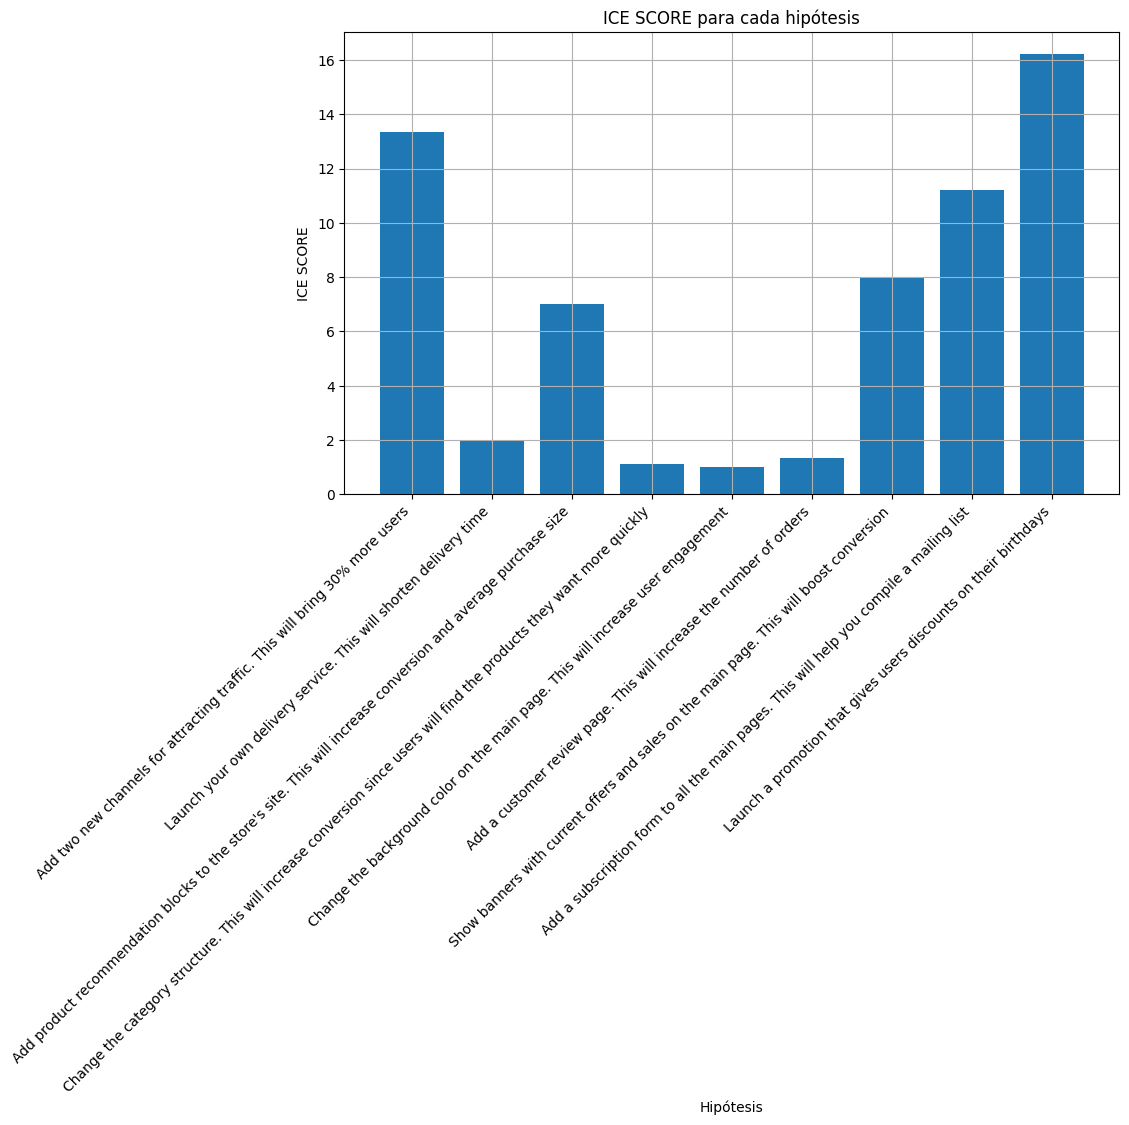

In [12]:
# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))
plt.bar(hypotheses['hypothesis'], hypotheses['ice_score'])

# Se agregan etiquetas a los ejes y el título del gráfico:
plt.xlabel("Hipótesis")
plt.ylabel("ICE SCORE")
plt.title("ICE SCORE para cada hipótesis")

# Rotar etiquetas del eje X:
plt.xticks(rotation=45, ha='right')

# Se agrega cuadrícula:
plt.grid(True)
# Mostrar el gráfico
plt.show()

In [13]:
# Se muestran los resultados de las RICE SCORE ordenados de forma decreciente:
print('A continuación, se presentan los RICE SCORE para cada hipótesis ordenados de mayor a menor RICE SCORE:')
hypotheses.sort_values(by = 'rice_score', ascending = False)[['hypothesis', 'rice_score']]

A continuación, se presentan los RICE SCORE para cada hipótesis ordenados de mayor a menor RICE SCORE:


,hypothesis,rice_score
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**Gráfica con los resultados de los RICE SCORE para cada hipótesis:**

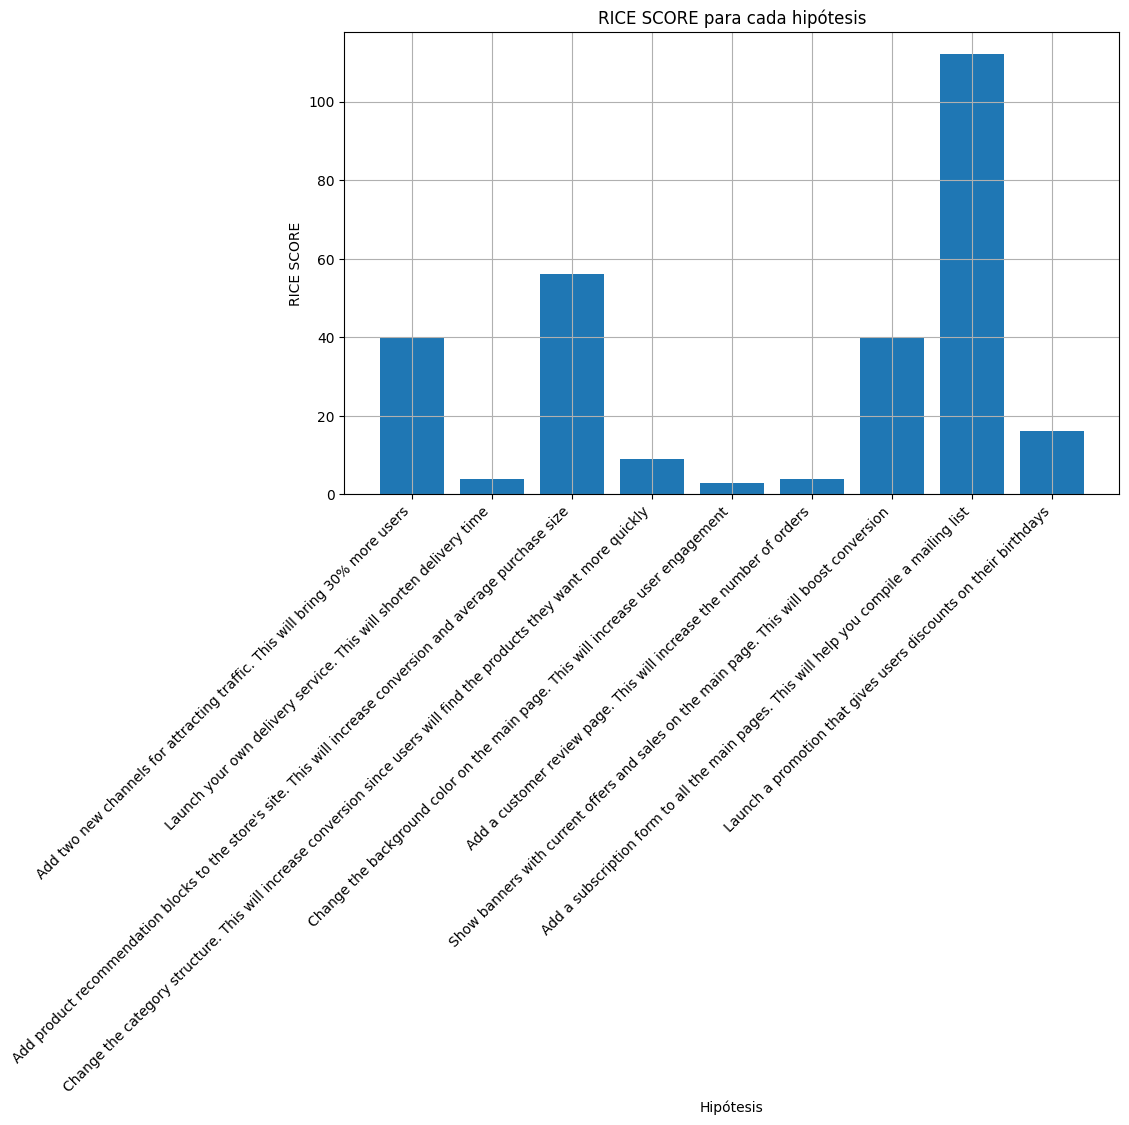

In [14]:
# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))
plt.bar(hypotheses['hypothesis'], hypotheses['rice_score'])

# Se agregan etiquetas a los ejes y el título del gráfico:
plt.xlabel("Hipótesis")
plt.ylabel("RICE SCORE")
plt.title("RICE SCORE para cada hipótesis")

# Rotar etiquetas del eje X:
plt.xticks(rotation=45, ha='right')

# Se agrega cuadrícula:
plt.grid(True)
# Mostrar el gráfico
plt.show()

**Conclusión:**

**- Se puede evidenciar que la priorización de cada hipótesis varía según si se aplica el framework ICE o si se usa el framework RICE.**

**- La única hipótesis que conserva su prioridad en ambos frameworks es la hipótesis ''Show banners with current offers and sales on the main page. This will boost conversion', cuya prioridad con ambos frameworks es el cuarto lugar.**

**- Aunque la priorización por el framework ICE emplea los mismos parámetros del RICE, el framework RICE incorpora un cuarto parámetro al cual no se toma en cuenta en el ICE pero que es muy relevante y es la cantidad de usuarios a los que alcanza la hipótesis y por eso se presenta la gran variación entre una framework y la otra.**

**- Las 3 hipótesis con mayor puntaje con la framework ICE son:
    'Launch a promotion that gives users discounts on their birthdays'.
    'Add two new channels for attracting traffic. This will bring 30% more users' y
    'Add a subscription form to all the main pages. This will help you compile a mailing list'.**

**- La 3 hipótesis con mayor puntuación con el framework RICE son:
    'Add a subscription form to all the main pages. This will help you compile a mailing list'.
    "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size" y
    'Add two new channels for attracting traffic. This will bring 30% more users'.**
    
**- Con ambos métodos de priorización, la hipótesis 'Add two new channels for attracting traffic. This will bring 30% more users' estuvo entre las 3 primeras hipotesis en orden de prioridad.**

**- Si bien es cierto cada criterio de priorización es valedero, es importante que las decisiones que se tomen permitan atraer el mayor número de clientes por lo que se sugiere darle mayor prioridad a la hipotesis 'Add a subscription form to all the main pages. This will help you compile a mailing list'.** 

# Parte 2. Análisis del test A/B

Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

1.- Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

2.- Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

3.- Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

4.- Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

5.- Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

6.- Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

7.- Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

8.- Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

9.- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

10.- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

11.- Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

12.- Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

13.- Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son:
    
    1. Parar la prueba, considerar a uno de los grupos como líder.
    2. Parar la prueba, concluir que no hay diferencia entre los grupos.
    3. Continuar la prueba.

## Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

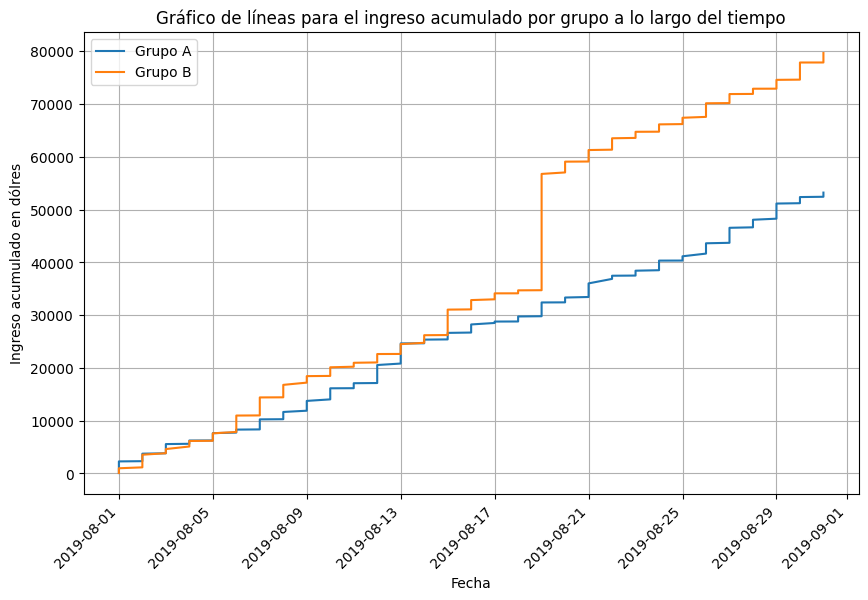

In [15]:
# Se extrae la información de las ventas del grupo A y se ordenan cronológicamente:
cumulative_revenue_a = filtred_orders[filtred_orders['group'] == 'A'].sort_values(by = 'date')

# Se genera una columna en la que se calcula el ingreso acumulado por día para el grupo A:
cumulative_revenue_a['cumulative_revenue'] = cumulative_revenue_a['revenue'].cumsum()

# Se extrae la información de las ventas del grupo B y se ordenan cronológicamente:
cumulative_revenue_b = filtred_orders[filtred_orders['group'] == 'B'].sort_values(by = 'date')

# Se genera una columna en la que se calcula el ingreso acumulado por día para el grupo B:
cumulative_revenue_b['cumulative_revenue'] = cumulative_revenue_b['revenue'].cumsum()

# Se dimensiona la gráfica:
plt.figure(figsize=(10, 6))

# Trazar gráfico de ingresos del grupo A:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['cumulative_revenue'], label = 'Grupo A')

# Trazar gráfico de ingresos del grupo A:
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['cumulative_revenue'], label = 'Grupo B')

# Se asignan nombres a los ejes y a la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado en dólres')
plt.title('Gráfico de líneas para el ingreso acumulado por grupo a lo largo del tiempo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan con un angulo de 45 grados en sentido 
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.show()

**Conclusiones y conjeturas:**

- Hasta el 5 de agosto las ventas acumuladas de los 2 grupos son similares.

- A partir del 6 de agosto hasta el 15 de agosto las ventas acumuladas del grupo B son ligeramente mayores a las del grupo A pero se igualan los días 13 y 14 de agosto.

- Del 15 de agosto en adelante al 18 de agosto, la diferencia acumulada del grupo B supera a la del grupo A pero no por mucho.

- Del 19 de agosto en adelante la diferencia de las ventas acumuladas del grupo B supera con casi 30 mil dólares aproximadamente al grupo A y a partir de ese día y hasta el fin de ese mes el grupo A no vuelve a acumular ventas que superen al grupo B.

- Esto puede deberse a que ese día en particular la empresa haya añadido una modificación al sitio web que haya generado esa gran variación que presentó el grupo B.

## Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

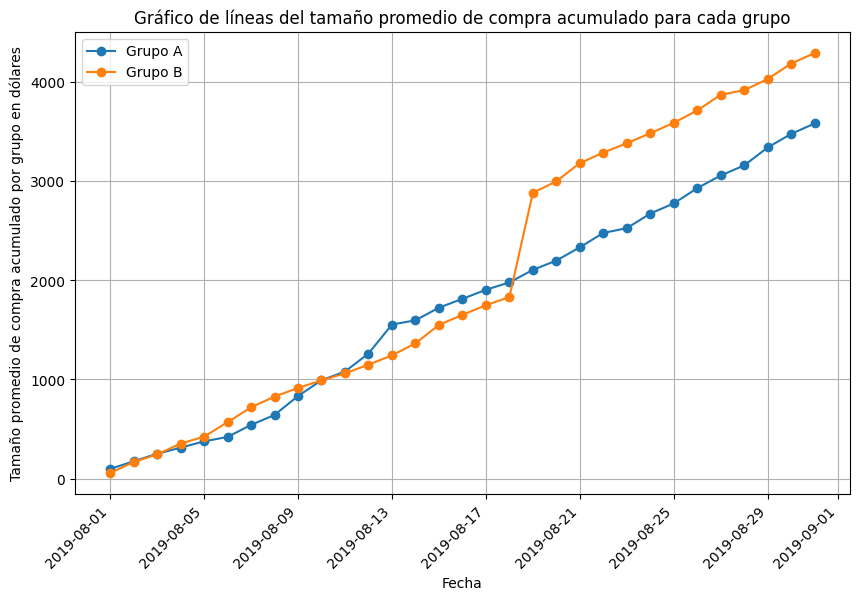

In [16]:
# Se calcula el tamaño promedio de compra del grupo A para cada día:
average_order_size_a = filtred_orders[filtred_orders['group'] == 'A'].groupby(['date']).agg({'revenue':'mean'})

# Se calcula el tamaño promedio de compra del grupo B para cada día:
average_order_size_b = filtred_orders[filtred_orders['group'] == 'B'].groupby(['date']).agg({'revenue':'mean'})

# Se calcula el promedio de compra aucmulada para el grupo A:
cumulative_average_order_size_a = average_order_size_a.cumsum()

# Se calcula el tamaño promedio de compra acumulada para el grupo B:
cumulative_average_order_size_b = average_order_size_b.cumsum()

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se grafican los valores para el promedio de compra acumulado del grupo A:
plt.plot(cumulative_average_order_size_a.index, cumulative_average_order_size_a.values, label = 'Grupo A', marker='o')

# Se grafican los valores para el promedio de compra acumulado del grupo B:
plt.plot(cumulative_average_order_size_b.index, cumulative_average_order_size_b.values, label = 'Grupo B', marker='o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Tamaño promedio de compra acumulado por grupo en dólares')
plt.title('Gráfico de líneas del tamaño promedio de compra acumulado para cada grupo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Mostrar la leyenda:
plt.legend()

# Se muestra la gráfica:
plt.show()

**Conclusiones y conjeturas:**

- De forma análoga a lo que ocurrió con las ventas acumuladas por grupos, el tamaño promedio de cada compra por día fué similar en los 2 grupos hasta el día 18 de agosto y de ahí en adelante el tamaño promedio de compra acumulado para el gupo B superó en casi 1000 dólares de promedio acumulado por día y esto se mantuvo de esta forma hasta el último día de agosto.

- Esa variación tan grande que ocurrió a partir del 19 de agosto, puede deberse a que ese día se hayan realizado cambios en el sitio web mostrado a los usuarios del grupo B que facilitaran mucho más las compras a los clientes respecto a la interfaz original.

## Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

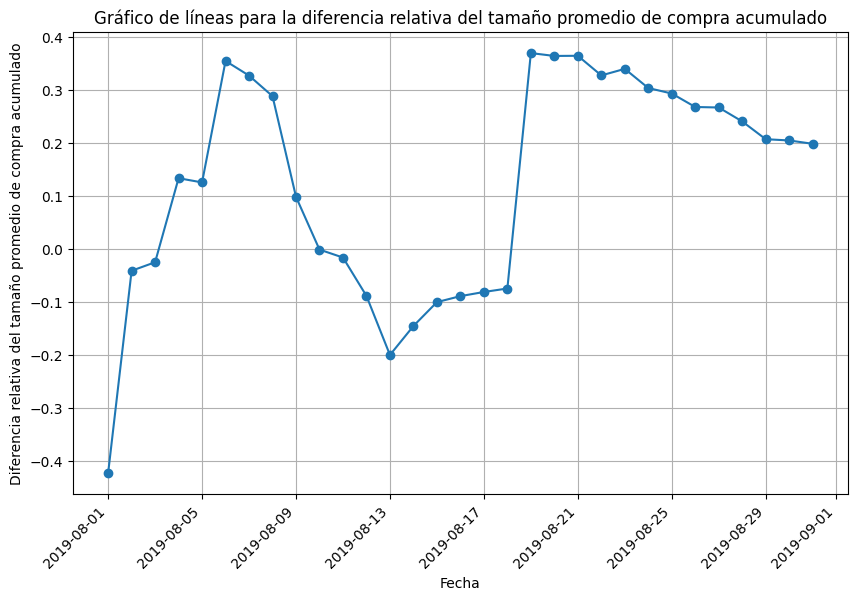

In [17]:
# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

plt.plot(cumulative_average_order_size_b.index,
         cumulative_average_order_size_b.values / cumulative_average_order_size_a.values - 1,
         marker = 'o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa del tamaño promedio de compra acumulado')
plt.title('Gráfico de líneas para la diferencia relativa del tamaño promedio de compra acumulado')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Se muestra la gráfica:
plt.show()

**Conclusiones y conjeturas:**

- Durante los 3 primeros días el grupo B tiene una desventaja en el promedio de compra diario por grupo respecto al grupo A.

- Desde el día 4 hasta el día 9 el grupo B tiene ventaja en el promedio de compra diario acumulado respecto al grupo A.

- Desde el 10 hasta el 18 de agosto se observa una desventaja en el tamaño promedio de compra diario acumulado respecto al grupo A.

- A partir del 19 de agosto y hasta el último del agosto, la diferencia está a favor del grupo B respecto al grupo A.

- Al igual que las conjeturas previas, se presumeque que a partir de ese día se presentó alguna modificación que haya facilitado las compras para los usuarios del grupo B.

## Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

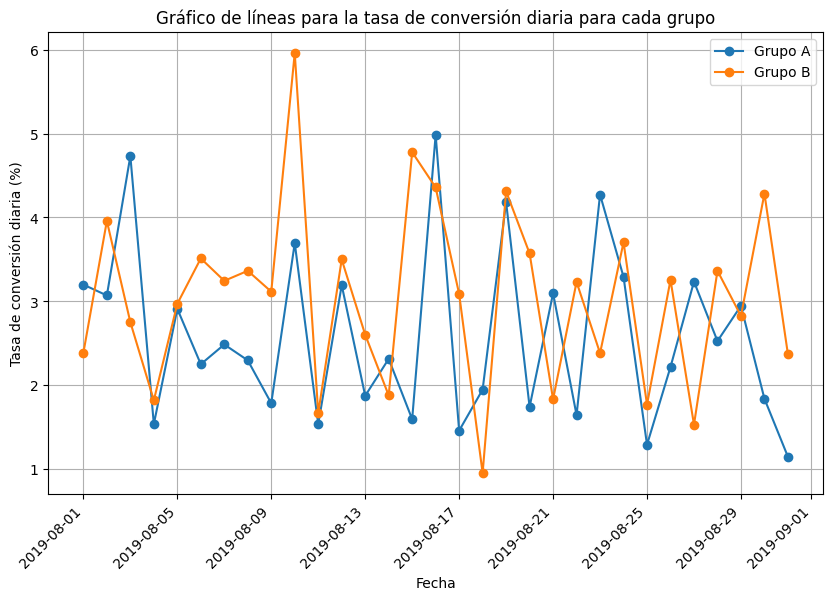

In [18]:
# Se calcula la cantidad de transacciones diarias para cada grupo:
n_transactions_a = filtred_orders[filtred_orders['group'] == 'A'].groupby('date')['transaction_id'].nunique()
n_transactions_b = filtred_orders[filtred_orders['group'] == 'B'].groupby('date')['transaction_id'].nunique()

# Se calclula la cantidad de visitas diarias por grupo:
n_visits_a = visits[visits['group'] == 'A'].sort_values(by = 'date')
n_visits_b = visits[visits['group'] == 'B'].sort_values(by = 'date')

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se grafica la tasa de conversión diaria para cada grupo:

plt.plot(n_transactions_a.index,
         n_transactions_a.values / n_visits_a['visits'] * 100,
         label = 'Grupo A',
         marker = 'o')

plt.plot(n_transactions_b.index,
         n_transactions_b.values / n_visits_b['visits'] * 100,
         label = 'Grupo B',
         marker = 'o')

# Se agregan etiquetas de los ejes y se asigna el nombre de la gráfica:
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión diaria (%)')
plt.title('Gráfico de líneas para la tasa de conversión diaria para cada grupo')

# Se muestra la cuadrícula:
plt.grid(True)

# Se rotan las etiquetas del eje X para que tener una mejor visualización de las fechas:
plt.xticks(rotation=45, ha='right') 

# Mostrar la leyenda:
plt.legend()

# Se muestra la gráfica:
plt.show()

**Conclusiones y conjeturas:**

- La tasa de conversión diaria para cada grupo es muy variable día a día.

- Los porcentajes de conversión diarios oscilan entre el **1** y el **6% aproximadamente**.

- De los 31 días de la prueba, **9 días** tuvo **mayor tasa de conversión** el **grupo A** y los otros **22 días** superó el **grupo B** al grupo A en la tasa de conversión.

- La **mayor tasa de conversión** del **grupo B** la alcanzó el **10 de agosto** y fué del **6%**, cabe destacar que fué el máximo valor de conversión para ambos grupos.

- La **mayor tasa de conversión** del **grupo A** la alcanzó el día **16 de agosto** y fué del **5%**.

- La **menor tasa de conversión** la tuvo el **grupo B** y fué inferior al **1%** el día **18 de agosto**.

- Tomando en consideración que el grupo B tuvo mayor tasa de conversión en 22 de los 31 días, se podría decir que es muy probable que los usuarios hayan tomado mucho mejor los cambios realizados al grupo B respecto a la versión original.

## Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

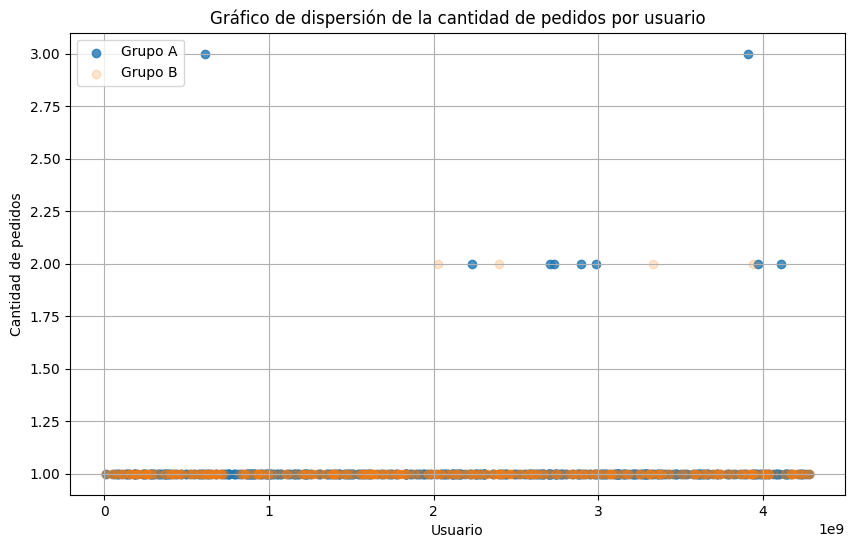

In [19]:
# Se halla la cantidad de transacciones para cada visitante del grupo A:
transactions_per_visitor_a = (filtred_orders[filtred_orders['group'] == 'A'].groupby(['date','visitor_id'])
                              .agg({'transaction_id': 'nunique'})).reset_index()

# Se cambia el nombre de la columna de agregación por un nombre descriptivo:
transactions_per_visitor_a.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se calcula la cantidad de transacciones para cada visitante del grupo B:
transactions_per_visitor_b = (filtred_orders[filtred_orders['group'] == 'B'].groupby(['date', 'visitor_id'])
                              .agg({'transaction_id': 'nunique'})).reset_index()

# Se cambia el nombre de la columna de agregación por un nombre descriptivo:
transactions_per_visitor_b.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se realiza gráfico de despersión para el grupo A:
plt.scatter(transactions_per_visitor_a['visitor_id'],
            transactions_per_visitor_a['n_transactions'],
            label = 'Grupo A',
            alpha = 0.8)

# Se realiza gráfico de dispersión paea el grupo B:
plt.scatter(transactions_per_visitor_b['visitor_id'],
            transactions_per_visitor_b['n_transactions'],
            label = 'Grupo B',
            alpha = 0.2)

# Se asignan los nombres a los ejes y al gráfico:
plt.xlabel("Usuario")
plt.ylabel("Cantidad de pedidos")
plt.title("Gráfico de dispersión de la cantidad de pedidos por usuario")

# Se muestra la cuadrícula:
plt.grid(True)

# Se muestra la leyenda:
plt.legend()
# Mostrar el gráfico
plt.show()

**Conclusiones y conjeturas:**

- La mayoría de los usuarios en ambos grupos realizan un solo pedido.

- Muy pocos visitantes realizaron 2 o 3 pedidos en todo el mes para ambos grupos.

- El número de pedidos por usuario no varía significativamente de un grupo a otro.

- Se presume que las modificaciones para el grupo B no inciden en la cantidad de compras que realiza el usuario en el mes.

## Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [20]:
print('El percentil 95 del número de pedidios por usuario es',
      np.percentile(orders.groupby('visitor_id')['transaction_id'].nunique(), 95))

El percentil 95 del número de pedidios por usuario es 2.0


In [21]:
print('El percentil 99 del número de pedidios por usuario es',
      np.percentile(orders.groupby('visitor_id')['transaction_id'].nunique(), 99))

El percentil 99 del número de pedidios por usuario es 4.0


**Conclusión:**

- El 95% de los visitantes no realizaron más de 2 pedidos en el mes de estudio.

- Menos el 1% de los usuarios realizaron más de 2 pedidos en el mes.

- Observando la gráfica de dispersión de la cantidad de pedidos por usuario y observando el cálculo de los percentiles, se considerarán los usuarios con más de 2 pedidos como datos atípicos.

## Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

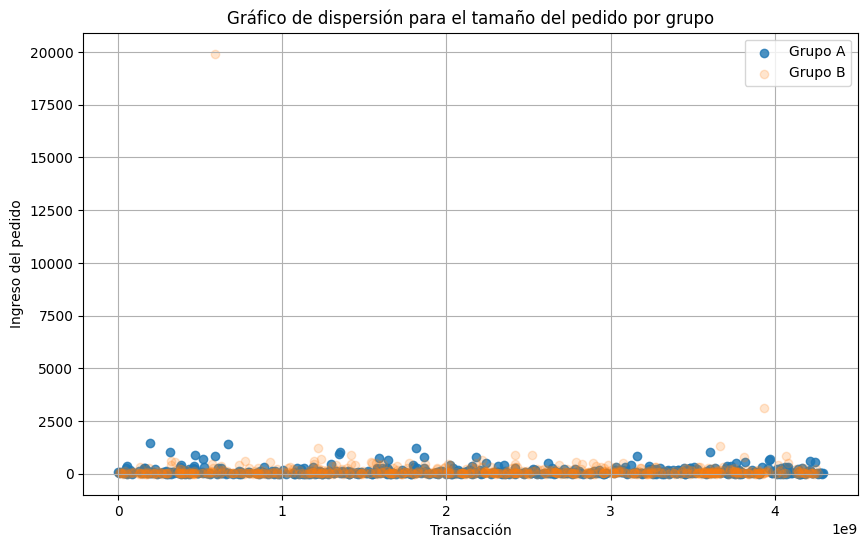

In [22]:
# Se dimensiona la gráfica
plt.figure(figsize=(10, 6))

# Se grafican los precios de cada pedido para cada grupo:

# Se grafican los precios de los pedidos para los usuarios del grupo A:
plt.scatter(orders[orders['group'] == 'A']['transaction_id'],
            orders[orders['group'] == 'A']['revenue'],
            label = 'Grupo A',
            alpha = 0.8)

# Se grafican los precios de los pedidos para los usuarios del grupo B:
plt.scatter(orders[orders['group'] == 'B']['transaction_id'],
            orders[orders['group'] == 'B']['revenue'],
            label = 'Grupo B',
            alpha = 0.2)


# Se asignan los nombres a los ejes y al gráfico:
plt.xlabel("Transacción")
plt.ylabel("Ingreso del pedido")
plt.title("Gráfico de dispersión para el tamaño del pedido por grupo")

# Se muestra la cuadrícula:
plt.grid(True)

# Se muestra la leyenda:
plt.legend()

# Mostrar el gráfico
plt.show()

**Conclusiones y conjeturas:**

- La mayoría de compras para cada grupo son inferiores a los 500 dóalres.

- Algunas pocas transacciones exceden los 500 dólares.

- El grupo A tiene los valores atípicos más altos siendo uno por 20 mil dólares y otro por poco más de 2 mil quinientos dólares.

- Tanto el grupo A como el B tienen bastante valores atípicos entre los 500 y los 2500 dólares.

## Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [23]:
print('El percentil 95 del tamaño de pedido es:',
      np.percentile(filtred_orders['revenue'], 95).round(2), 'dólares.')

El percentil 95 del tamaño de pedido es: 414.28 dólares.


In [24]:
print('El percentil 99 del tamaño de pedido es:',
      np.percentile(filtred_orders['revenue'], 99).round(2), 'dólares.')

El percentil 99 del tamaño de pedido es: 830.3 dólares.


**Conclusiones y conjeturas:**

- El 95% de los visitantes realizan compras inferiores a los 415 dólares.

- Menos del 1% de los visitantes realizan compras por montos superiores a los 830 dólares.

- Se considerarán como datos atípicos de tamaño de pedido, aquellos cuyo tamaño de pedido es superior a los 410 dólares.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Anteriormente se obtuvo el dataframe filtred_orders a partir del dataframe orders. De éste último se eliminaron los visitantes que eran comunes a ambos grupos y se almacenaron en filtred_orders; estos datos son los que se usarán para realizar la prueba de hipótesis.

**Se calcula la tasa de conversión de cada grupo y la de la población general:**

In [26]:
# Se calcula el total de personas del grupo A que compraron:
x_a = filtred_orders[filtred_orders['group'] == 'A']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo A:
n_a = visits[visits['group'] == 'A']['visits'].sum()

# Se calcula el total de personas del grupo B que compraron:
x_b = filtred_orders[filtred_orders['group'] == 'B']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo B:
n_b = visits[visits['group'] == 'B']['visits'].sum()

# Se calculan las proporciones muestrales:
p_a = x_a / n_a
p_b = x_b / n_b

# Se calcula la proporción combinada:
p = (x_a + x_b) / (n_a + n_b)

**Se realiza el test estadístico:**

In [28]:
# Se calcula el error estándar
error_estandar = np.sqrt(p * (1 - p) * (1/n_a + 1/n_b))

# Se calcula el estadístico Z:
# Calcular el estadístico Z
z = (p_a - p_b) / error_estandar

# Se calcula el valor p asociado al estadístico Z:
# Se usa la función st.norm.sf para obtener la probabilidad de la cola superior
# Se multiplica por 2 para una prueba bilateral (two-sided test)
p_valor = 2 * st.norm.sf(abs(z)) # abs() porque es una prueba bilateral

# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en la tasa de conversión entre los grupos A y B.
# HA: Si existe diferencia en la tasa de conversión entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if p_valor < alpha:
      print('Con un alpha de', alpha, 'se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')
else:
      print('Con un alpha de', alpha, 'se acepta la hipotesis nula; esto es, no existe diferencia en la tasa conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')

# Se imprimen los resultados:
print('La tasa de conversión del grupo de control es', round(p_a * 100, 2), '%, y la tasa de conversión del grupo modificado',
      'es', round(p_b * 100, 2),'%.\n')
print('El estadístico de prueba es Z =', round(z, 4))
print('El p-valor es:', p_valor)

print('La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de', round(p_b/p_a, 3) - 1)

Con un alpha de 0.05 se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre el grupo de control
 y el grupo con modificaciones.

La tasa de conversión del grupo de control es 2.38 %, y la tasa de conversión del grupo modificado es 2.79 %.

El estadístico de prueba es Z = -2.5449
El p-valor es: 0.010932089565536035
La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de 0.17500000000000004


**Conclusión y conjeturas:**

- Según los datos sin procesar, si existen diferencias significativas en la tasa de conversión de los grupos A y B, ya que el p-valor es inferior al alpha que se seleccionó.

- La tasa de conversión del grupo B respecto al grupo A es un 17.5% mayor.

- Se puede concluir que el grupo B tiene una tasa de coversión mayor que la tasa de conversión del grupo A.

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Se realiza una prueba para verificar si las varianzas de las muestras son significativamente distintas:

In [29]:
# Se obtiene el ingreso para cada transacción del grupo A:
group_a_transaction_revenue = filtred_orders[filtred_orders['group'] == 'A']['revenue']

# Se obtiene el ingreso para cada transacción del grupo B:
group_b_transaction_revenue = filtred_orders[filtred_orders['group'] == 'B']['revenue']

# Se realiza una pruebla levene:

# Se planetan las hiiótesis:
# H0: No existe diferencia entre las varianzas de los grupos A y B.
# HA: Si existe diferencia entre las varianzas de los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la prueba:
result = st.levene(group_a_transaction_revenue, group_b_transaction_revenue)

# Se realiza la comparación para determinar si se acepta o se rechaza la hiótesis nula:
if result[1] < alpha:
    witness = False
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')
else:
    witness = True
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')

print('El estadístico de prueba es:', result[0].round(3), ' y el p-valor es:', result[1].round(3), '\n')

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El estadístico de prueba es: 0.594  y el p-valor es: 0.441 



Se realiza una prueba para comparar si el tamaño promedio del pedido es significativamente distinto para los grupos A y B:

In [ ]:
# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en el tamaño promedio de compra entre los grupos A y B.
# HA: Si existe diferencia en el tamaño promedio de compra entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se calcula la significancia:
result = st.ttest_ind(group_a_transaction_revenue, group_b_transaction_revenue, equal_var = witness)

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if result[1] < alpha:
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')
else:
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.\n')

print('El estadístico de prueba es:', result[0].round(3), 'y el p-valor es:', result[1].round(3), '\n')

print('La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de',
      (group_b_transaction_revenue.mean() / group_a_transaction_revenue.mean() - 1).round(3))

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El p-valor es: 0.862 

La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de 0.278


**Conclusión y conjeturas:**

- Al realizar el ttest_ind con los datos en bruto se evidencia que no existen diferencias estadísticas en el tamaño promedio de los pedidos del grupo B respecto del grupo A.

- Al comparar la diferencia relativa entre el tamaño promedio de compra del grupo B respecto del grupo A se evidencia una diferencia del **27.8%** mayor del grupo B respecto del grupo A.

## Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Se van a definir los visitantes atípicos como aquellos que realizaron más de 2 pedidos o con compras superiores a los 410 dólares. De éste modo, se estarían elimnando poco menos del 5% de los visitantes con más de 2 pedidos y del el 5% de los usuarios con pedidos de mas de 410 dólares.

In [ ]:
# Se obtienen los id de los visitantes con valores atípicos:

# Se obtienen los id visitantes cuyas compras fueron superiores a 410 dólares:
visitors_with_expensive_transactions = filtred_orders[filtred_orders['revenue'] > 410]['visitor_id']

# Se obtienen los id de los visitantes con más de 2 compras:

# Se obtiene la cantidad de pedidos para cada visitante:
n_transactions_per_visitor = filtred_orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()

# se cambia el nombre de la columna de agregación por un nombre descriptivo de los datos:
n_transactions_per_visitor.rename(columns = {'transaction_id': 'n_transactions'}, inplace = True)

# Se extrae el id de los visitantes con más de 2 pedidos:
visitors_with_many_transactions = n_transactions_per_visitor[n_transactions_per_visitor['n_transactions'] > 2]['visitor_id']

# Se une la lista de id de visitantes cuya cantidad de pedidos es superior a 2 y cuyo tamaño de pedido es superior a 410 dólares:
abnormal_visitors = pd.concat([visitors_with_many_transactions, visitors_with_expensive_transactions], axis = 0)

# Se eliminan los duplicados de la lista:
abnormal_visitors = abnormal_visitors.drop_duplicates().sort_values()
print("La cantidad de valores atípicos es:")
len(abnormal_visitors)

La cantidad de valores atípicos es:


61

**Se calcula la tasa de conversión de cada grupo y la de la población general:**

In [ ]:
# Se excluyen los datos atípicos:
normal_orders = filtred_orders[~filtred_orders['visitor_id'].isin(abnormal_visitors)]

# Se calcula el total de personas del grupo A que compraron:
x_a = normal_orders[normal_orders['group'] == 'A']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo A:
n_a = visits[visits['group'] == 'A']['visits'].sum()

# Se calcula el total de personas del grupo B que compraron:
x_b = normal_orders[normal_orders['group'] == 'B']['visitor_id'].nunique()

# Se calcula la cantidad de visitantes del grupo B:
n_b = visits[visits['group'] == 'B']['visits'].sum()

# Se calculan las proporciones muestrales:
p_a = x_a / n_a
p_b = x_b / n_b

# Se calcula la proporción combinada:
p = (x_a + x_b) / (n_a + n_b)

**Se realiza el test estadístico:**

In [ ]:
# Se calcula el error estándar
error_estandar = np.sqrt(p * (1 - p) * (1/n_a + 1/n_b))

# Se calcula el estadístico Z:
# Calcular el estadístico Z
z = (p_a - p_b) / error_estandar

# Se calcula el valor p asociado al estadístico Z:
# Se usa la función st.norm.sf para obtener la probabilidad de la cola superior
# Se multiplica por 2 para una prueba bilateral (two-sided test)
p_valor = 2 * st.norm.sf(abs(z)) # abs() porque es una prueba bilateral

# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en la tasa de conversión entre los grupos A y B.
# HA: Si existe diferencia en la tasa de conversión entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if p_valor < alpha:
      print('Con un alpha de', alpha, 'se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')
else:
      print('Con un alpha de', alpha, 'se acepta la hipotesis nula; esto es, no existe diferencia en la tasa conversión entre',
            'el grupo de control\n y el grupo con modificaciones.\n')

# Se imprimen los resultados:
print('La tasa de conversión del grupo de control es', round(p_a * 100, 2), '%, y la tasa de conversión del grupo\n modificado',
      'es', round(p_b * 100, 2),'%.\n')
print('El estadístico de prueba es Z =', round(z, 4))
print('El p-valor es:', p_valor)

print('La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de', round(p_b/p_a, 3) - 1)

Con un alpha de 0.05 se rechaza la hipótesis nula; estos es, si existe diferencia en la tasa de conversión entre el grupo de control
 y el grupo con modificaciones.

La tasa de conversión del grupo de control es 2.23 %, y la tasa de conversión del grupo
 modificado es 2.62 %.

El estadístico de prueba es Z = -2.4686
El p-valor es: 0.013565249767847854
La diferencia relativa entre la tasa de conversión del grupo B respecto del grupo A es de 0.17599999999999993


**Conclusiones y conjeturas:**

- Eliminnado los datos atípicos, el test estadístico revela que si existe diferencia entre las tasas de conversión de ambos grupos.

- La diferencia relativa de la tasa de conversión de los grupos es del 17.6%, esto quiere decir que la tasa de conversión del grupo B es un 17.6% mayor que la del grupo A.

- Al eliminar los datos atípicos incremento ligeramente el valor p, así como la diferencia relativa.

## Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Dado que ya se cuenta con un dataframe que ya contiene excluidos los datos atípicos, se trabajará con éste.

In [ ]:
revenue_per_order_a = normal_orders[normal_orders['group'] == 'A']['revenue']

revenue_per_order_b = normal_orders[normal_orders['group'] == 'B']['revenue']

**Se realiza el test estadístico:**

In [ ]:
# Se realiza el test estadístico:

# Se planetan las hipotesis:
# H0: No existe diferencia en tamaño promedio de compra entre los grupos A y B.
# HA: Si existe diferencia en tamaño promedio de compra entre los grupos A y B.

# Se selecciona el alpha:
alpha = .05

# Se calcula la significancia:
result = st.ttest_ind(revenue_per_order_a, revenue_per_order_b)

# Se realiza la compraración y se determina si se acepta o se rechaza la hipótesis nula:
if result[1] < alpha:
    print('Se rechaza la hipótesis nula; estos es, si existe diferencia en el tamaño promedio de compra',
          'entre los grupos A y B.\n')
else:
    print('Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra',
          'entre los grupos A y B.\n')

print('El p-valor es:', result[1].round(3), '\n')

print('La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de',
      (revenue_per_order_b.mean() / revenue_per_order_a.mean() - 1).round(3))

Se acepta la hipotesis nula; esto es, no existe diferencia en el tamaño promedio de compra entre los grupos A y B.

El p-valor es: 0.42 

La diferencia relativa entre el tamaño promedio de compra del grupo B respecto al grupo A es de -0.054


**Conclusión y conjeturas:**

- Con los datos filtrados, no se halla diferencia estadística en el tamaño promedio de compra del grupo B respecto del grupo A.

- Al realizar el cálculo de la diferencia relativa del tamaño promedio de compra del grupo B respcto del grupo A se obtiene que la diferencia entre los promedios de la muestra del grupo B es 5.4% menor que la del grupo A.

## Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Tomando en consideración que:

- No existe diferencia en el tamaño promedio de compra entre los grupos después de excluir los datos atípicos para el análisis.

- La tasa de conversión del grupo B es mayor que la del grupo A.

- Asumiendo que la hipótesis planteada de los cambios presentados al grupo B solo fuese aumentar la tasa de conversión, se toma la decisión de:

**Parar la prueba y considerar al grupo B como el lider sobre el grupo A.**

En el caso de esperar que el estudio pretendiera demostrar que el tamaño promedio de compra aumentaría o que la cantidad de compras por usuario incrementaría, se toma la decisión de:

**Parar la pureba, concluir que no hay diferencia entre los grupos.**